In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

In [2]:
# Get the actual data from Yahoo Finance for the period 2024-August to 2024-September
# ticker = "1155.KL"
# actual_data = yf.download(ticker, start="2004-07-01", end="2024-08-01")
actual_data = pd.read_csv("data/combined_df.csv")
# cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'GDP (constant 2015 MYR)', 'GDP Growth YOY (%)', 'OPR (%)']
# actual_data = actual_data[cols]
actual_data['Date'] = pd.to_datetime(actual_data['Date'])
actual_data.set_index('Date', inplace=True)

# Extract actual close prices and dates
actual_prices = actual_data['Close'].values
actual_dates = actual_data.index


In [3]:
print(actual_data.info())
actual_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7336 entries, 2004-07-01 to 2024-07-31
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Open                     7336 non-null   float64
 1   High                     7336 non-null   float64
 2   Low                      7336 non-null   float64
 3   Close                    7336 non-null   float64
 4   Adj Close                7336 non-null   float64
 5   Volume                   7336 non-null   float64
 6   GDP (constant 2015 MYR)  7336 non-null   float64
 7   GDP Growth YOY (%)       7336 non-null   float64
 8   Inflation Rate (%)       7336 non-null   float64
 9   OPR (%)                  7336 non-null   float64
dtypes: float64(10)
memory usage: 630.4 KB
None


,Open,High,Low,Close,Adj Close,Volume,GDP (constant 2015 MYR),GDP Growth YOY (%),Inflation Rate (%),OPR (%)
Date,,,,,,,,,,
2004-07-01,7.256431,7.328277,7.184585,7.256431,2.196594,2016957.0,7.965000e+11,6.783438,1.421271,2.7
2004-07-02,7.256431,7.328277,7.184585,7.328277,2.218341,1104447.0,7.965000e+11,6.783438,1.421271,2.7
2004-07-03,7.256431,7.615660,7.256431,7.543814,2.283586,5489669.0,7.965000e+11,6.783438,1.421271,2.7
2004-07-04,7.256431,7.615660,7.256431,7.543814,2.283586,5489669.0,7.965000e+11,6.783438,1.421271,2.7
2004-07-05,7.256431,7.615660,7.256431,7.543814,2.283586,5489669.0,7.965000e+11,6.783438,1.421271,2.7


In [4]:
actual_data = pd.read_csv("data/combined_df.csv")
cols = ['Date', 'GDP (constant 2015 MYR)', 'GDP Growth YOY (%)', 'OPR (%)', 'Inflation Rate (%)']
macro_df = actual_data[cols]
macro_df['Date'] = pd.to_datetime(macro_df['Date'])
macro_df.set_index('Date', inplace=True)
print(macro_df.info())
macro_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7336 entries, 2004-07-01 to 2024-07-31
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GDP (constant 2015 MYR)  7336 non-null   float64
 1   GDP Growth YOY (%)       7336 non-null   float64
 2   OPR (%)                  7336 non-null   float64
 3   Inflation Rate (%)       7336 non-null   float64
dtypes: float64(4)
memory usage: 286.6 KB
None


C:\Users\kh\AppData\Local\Temp\ipykernel_4268\2950357352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macro_df['Date'] = pd.to_datetime(macro_df['Date'])


,GDP (constant 2015 MYR),GDP Growth YOY (%),OPR (%),Inflation Rate (%)
Date,,,,
2004-07-01,7.965000e+11,6.783438,2.7,1.421271
2004-07-02,7.965000e+11,6.783438,2.7,1.421271
2004-07-03,7.965000e+11,6.783438,2.7,1.421271
2004-07-04,7.965000e+11,6.783438,2.7,1.421271
2004-07-05,7.965000e+11,6.783438,2.7,1.421271


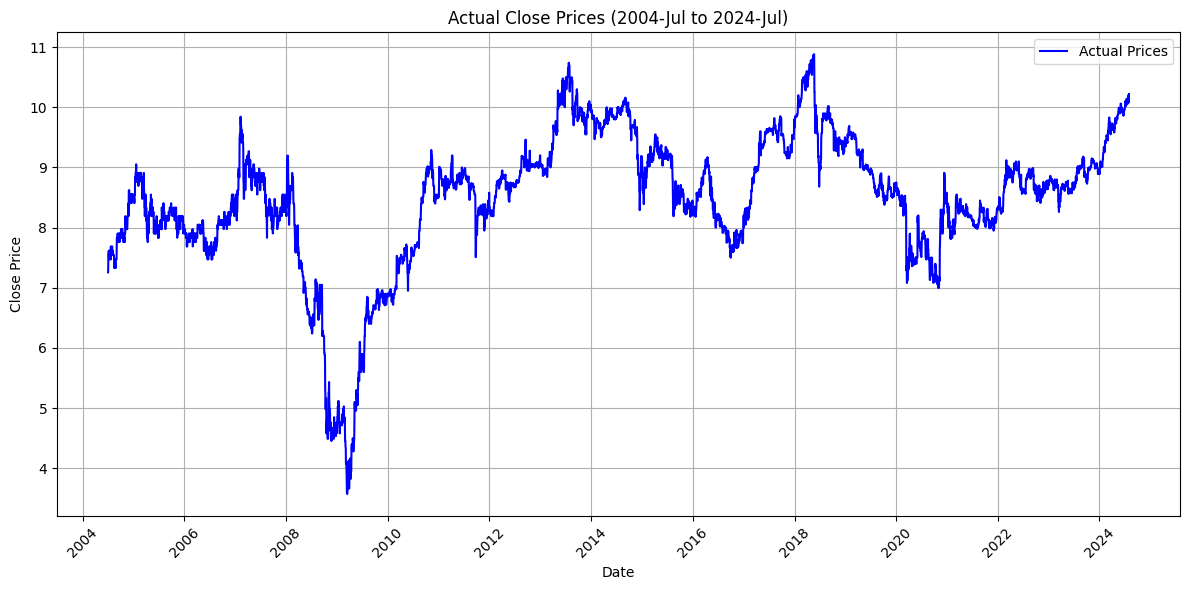

In [8]:
import matplotlib.dates as mdates

actual_data['Date'] = pd.to_datetime(actual_data['Date'])
actual_data.set_index('Date', inplace=True)

# Extract actual close prices and dates
actual_prices = actual_data['Close'].values
actual_dates = actual_data.index

plt.figure(figsize=(12, 6))
plt.plot(actual_dates, actual_prices, label="Actual Prices", linestyle="-", color="blue")
plt.title("Actual Close Prices (2004-Jul to 2024-Jul)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()

# Format x-axis to display only the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Show only years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Show ticks every 2 years

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


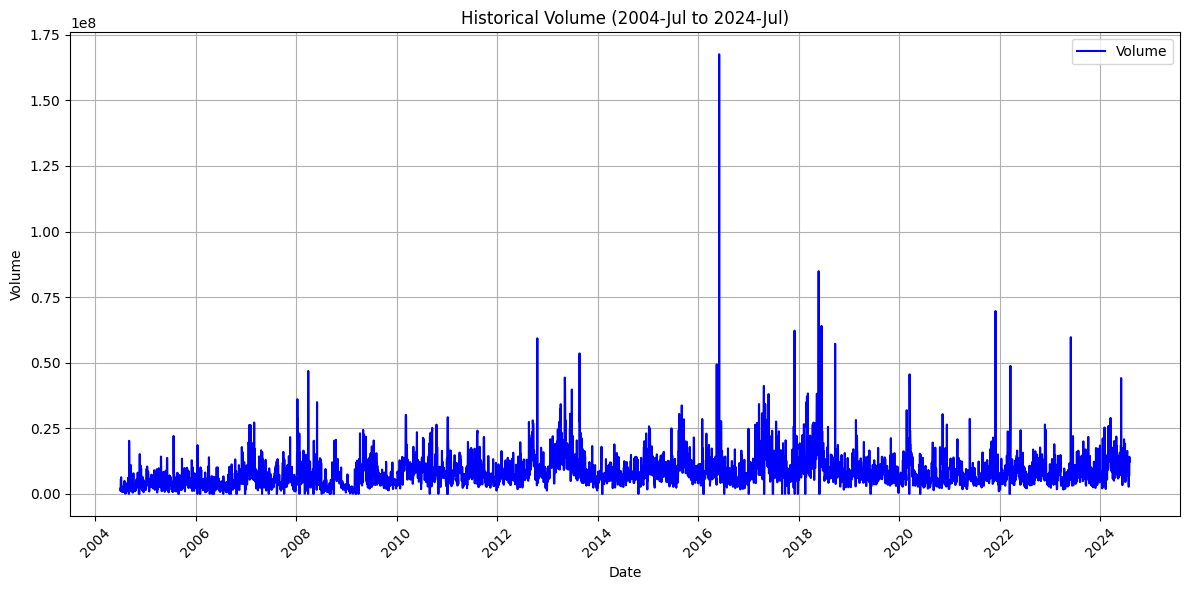

In [9]:
# Extract actual close prices and dates
volumes = actual_data['Volume'].values
actual_dates = actual_data.index

# plt.figure(figsize=(12, 6))
# plt.hist(volumes, bins=30, color="skyblue", edgecolor="black", alpha=0.7)
# plt.title("Distribution of Volumes")
# plt.xlabel("Volumne")
# plt.ylabel("Frequency")
# plt.grid()
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(12, 6))
plt.plot(actual_dates, volumes, label="Volume", linestyle="-", color="blue")
plt.title("Historical Volume (2004-Jul to 2024-Jul)")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid()
# Format x-axis to display only the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Show only years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Show ticks every 2 years

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

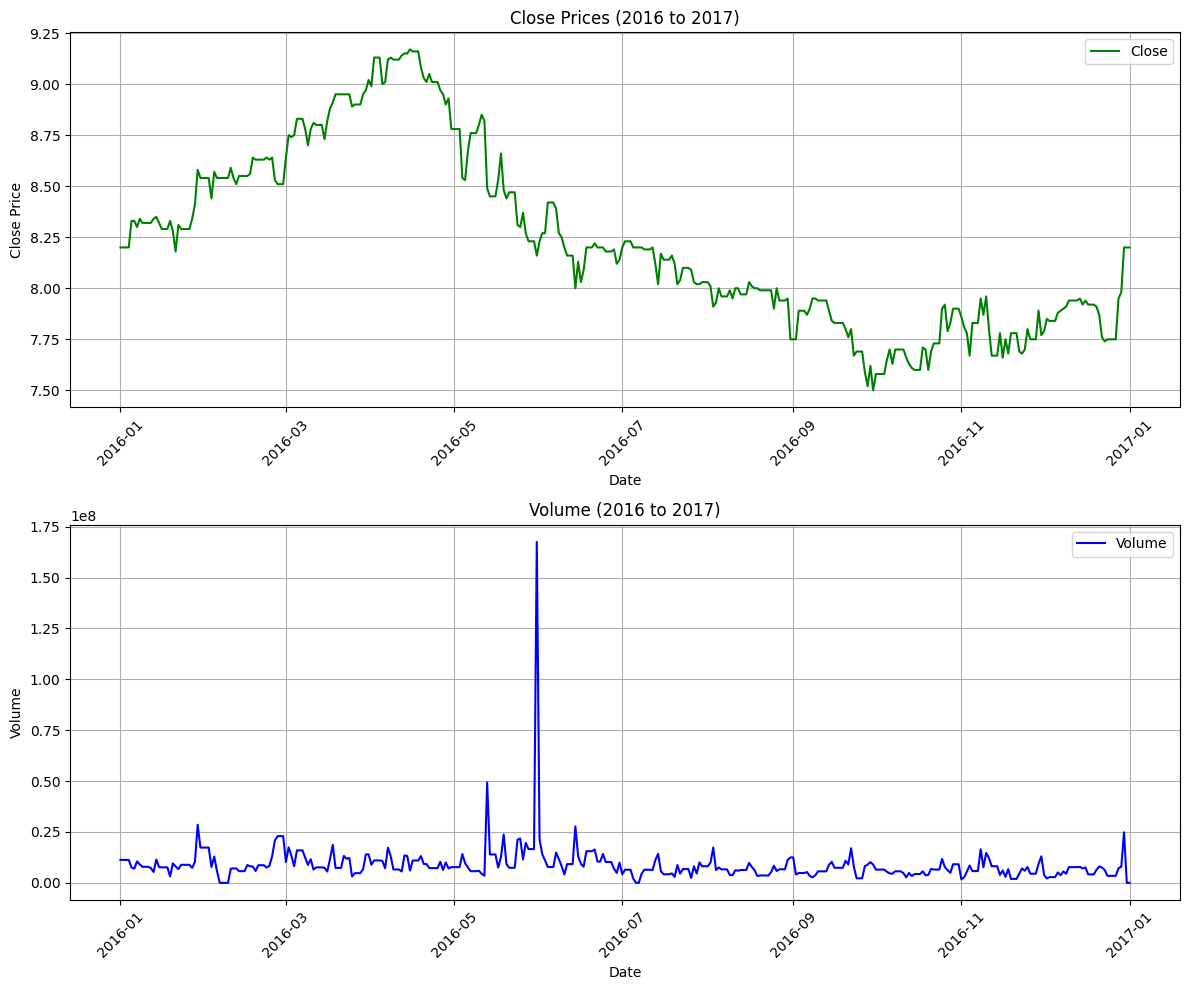

In [16]:
start = '2016-01-01'
end = '2017-01-01'
filter_df = actual_data.loc[start:end]
filter_dates = filter_df.index
filter_closes = filter_df['Close'].values
filter_volumes = filter_df['Volume'].values

# Create subplots for Volume and Close
plt.figure(figsize=(12, 10))

# Subplot for Close
plt.subplot(2, 1, 1)
plt.plot(filter_dates, filter_closes, label="Close", linestyle="-", color="green")
plt.title("Close Prices (2016 to 2017)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.xticks(rotation=45)

# Subplot for Volume
plt.subplot(2, 1, 2)
plt.plot(filter_dates, filter_volumes, label="Volume", linestyle="-", color="blue")
plt.title("Volume (2016 to 2017)")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid()
plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [7]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7336 entries, 0 to 7335
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     7336 non-null   object 
 1   Open                     7336 non-null   float64
 2   High                     7336 non-null   float64
 3   Low                      7336 non-null   float64
 4   Close                    7336 non-null   float64
 5   Adj Close                7336 non-null   float64
 6   Volume                   7336 non-null   float64
 7   GDP (constant 2015 MYR)  7336 non-null   float64
 8   GDP Growth YOY (%)       7336 non-null   float64
 9   Inflation Rate (%)       7336 non-null   float64
 10  OPR (%)                  7336 non-null   float64
dtypes: float64(10), object(1)
memory usage: 630.6+ KB


In [21]:
df = actual_data.copy()
df = df.drop(columns='Adj Close')
df.describe()

,Open,High,Low,Close,Volume,GDP (constant 2015 MYR),GDP Growth YOY (%),Inflation Rate (%),OPR (%)
count,7336.000000,7336.000000,7336.000000,7336.000000,7.336000e+03,7.336000e+03,7336.000000,7336.000000,7336.000000
mean,8.477790,8.533048,8.423304,8.478782,8.141796e+06,1.299347e+12,4.468023,2.256638,2.864558
std,1.127184,1.124268,1.132844,1.128860,6.039052e+06,3.126217e+11,2.974281,1.377911,0.511971
min,3.556369,3.574331,3.538408,3.574331,0.000000e+00,7.965000e+11,-5.456847,-1.138702,1.750000
25%,8.040000,8.081993,7.974889,8.037754,4.504140e+06,9.900000e+11,4.413187,1.622852,2.700000
50%,8.620000,8.670000,8.560000,8.620000,6.901800e+06,1.291500e+12,5.091532,2.105012,3.000000
75%,9.124423,9.170000,9.070000,9.120000,1.028330e+07,1.570500e+12,5.812722,3.142991,3.250000
max,10.880000,11.080000,10.820000,10.880000,1.675338e+08,1.804500e+12,8.650344,5.440782,3.500000


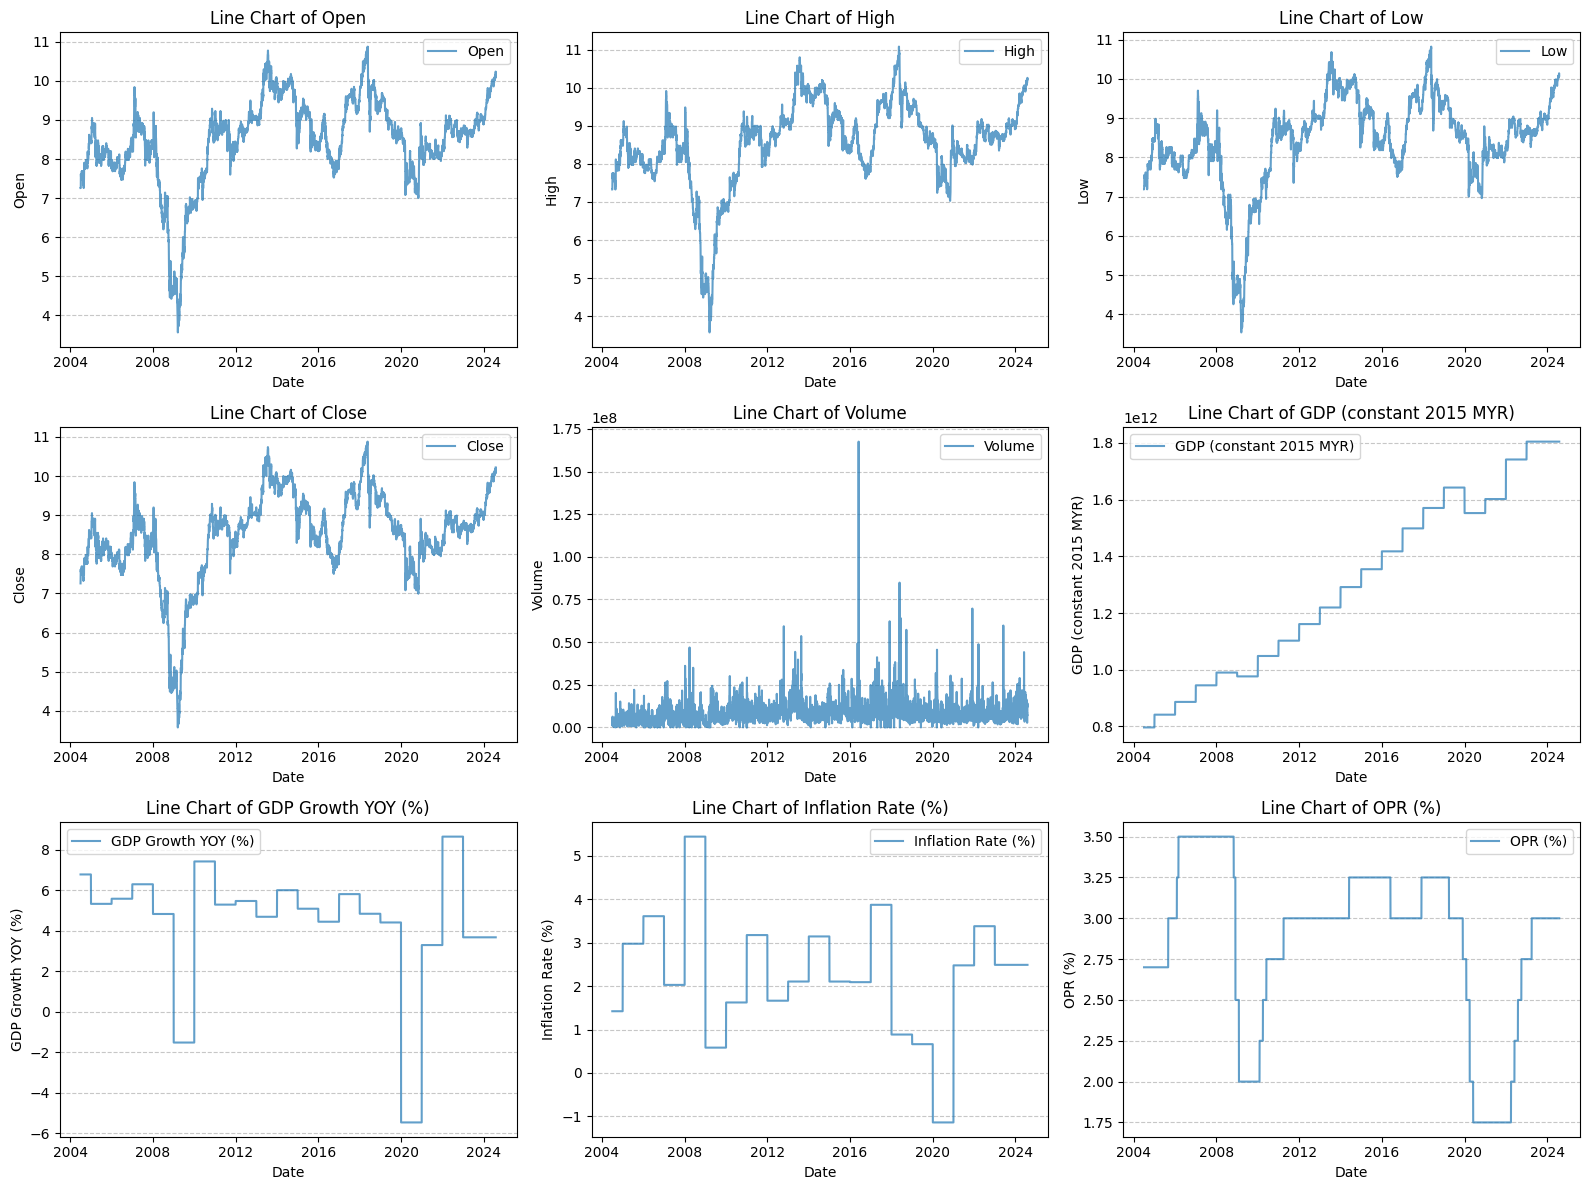

In [17]:
columns_to_visualize = ['Open', 'High', 'Low', 'Close', 'Volume','GDP (constant 2015 MYR)', 'GDP Growth YOY (%)', 'Inflation Rate (%)', 'OPR (%)']

plt.figure(figsize=(16, 12))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 3, i)  # Creates a 3x3 grid and positions each chart
    plt.plot(actual_data.index, actual_data[column], label=column, linestyle="-", alpha=0.7)
    plt.title(f"Line Chart of {column}")
    plt.xlabel("Date")
    plt.ylabel(column)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

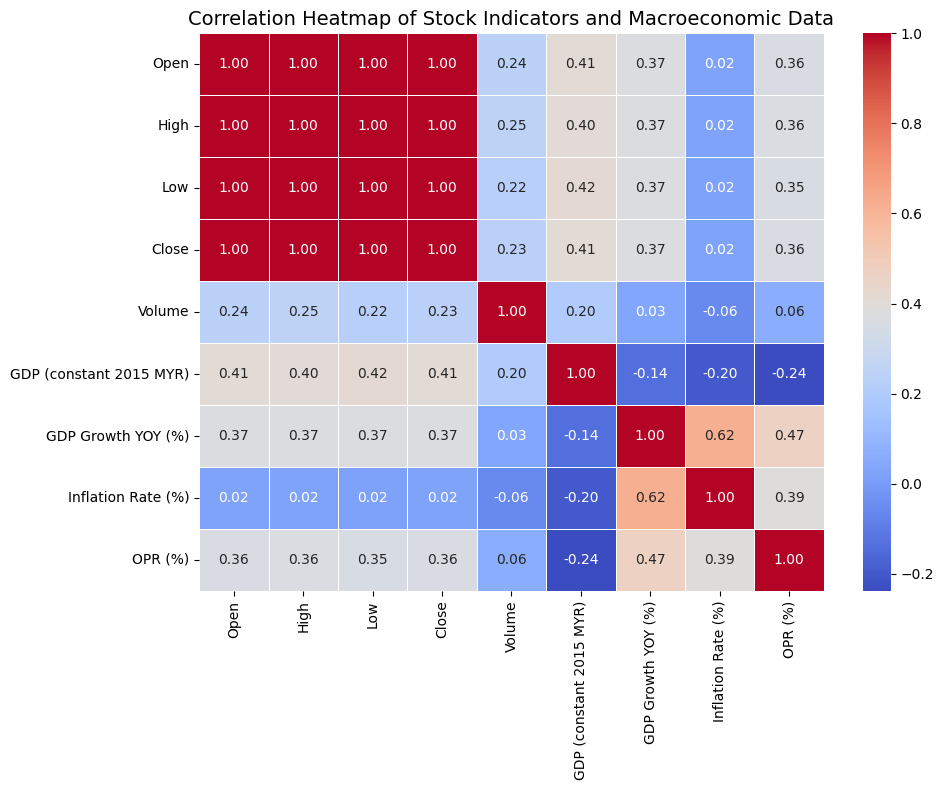

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_visualize = ['Open', 'High', 'Low', 'Close', 'Volume','GDP (constant 2015 MYR)', 'GDP Growth YOY (%)', 'Inflation Rate (%)', 'OPR (%)']


# Compute the correlation matrix
correlation_matrix = actual_data[columns_to_visualize].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Stock Indicators and Macroeconomic Data", fontsize=14)

# Show the heatmap
plt.tight_layout()
plt.show()


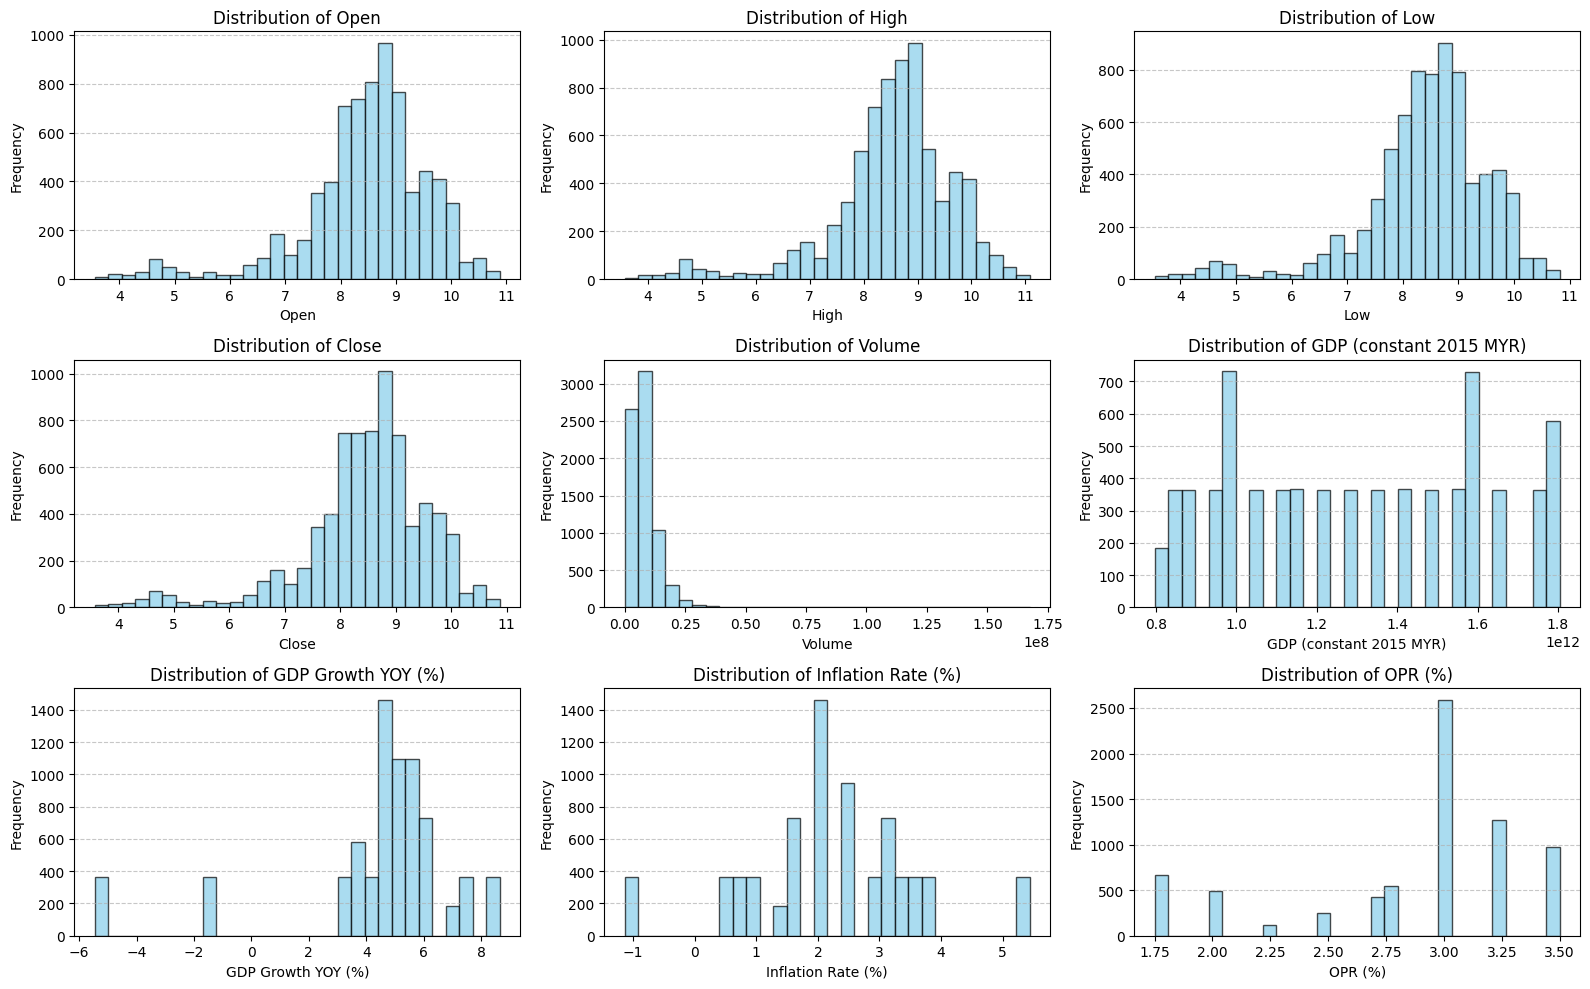

In [28]:
# Columns to visualize
columns_to_visualize = ['Open', 'High', 'Low', 'Close', 'Volume','GDP (constant 2015 MYR)', 'GDP Growth YOY (%)', 'Inflation Rate (%)', 'OPR (%)']

# Plot Histograms
plt.figure(figsize=(16, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 3, i)
    plt.hist(actual_data[column].dropna(), bins=30, color="skyblue", edgecolor="black", alpha=0.7)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


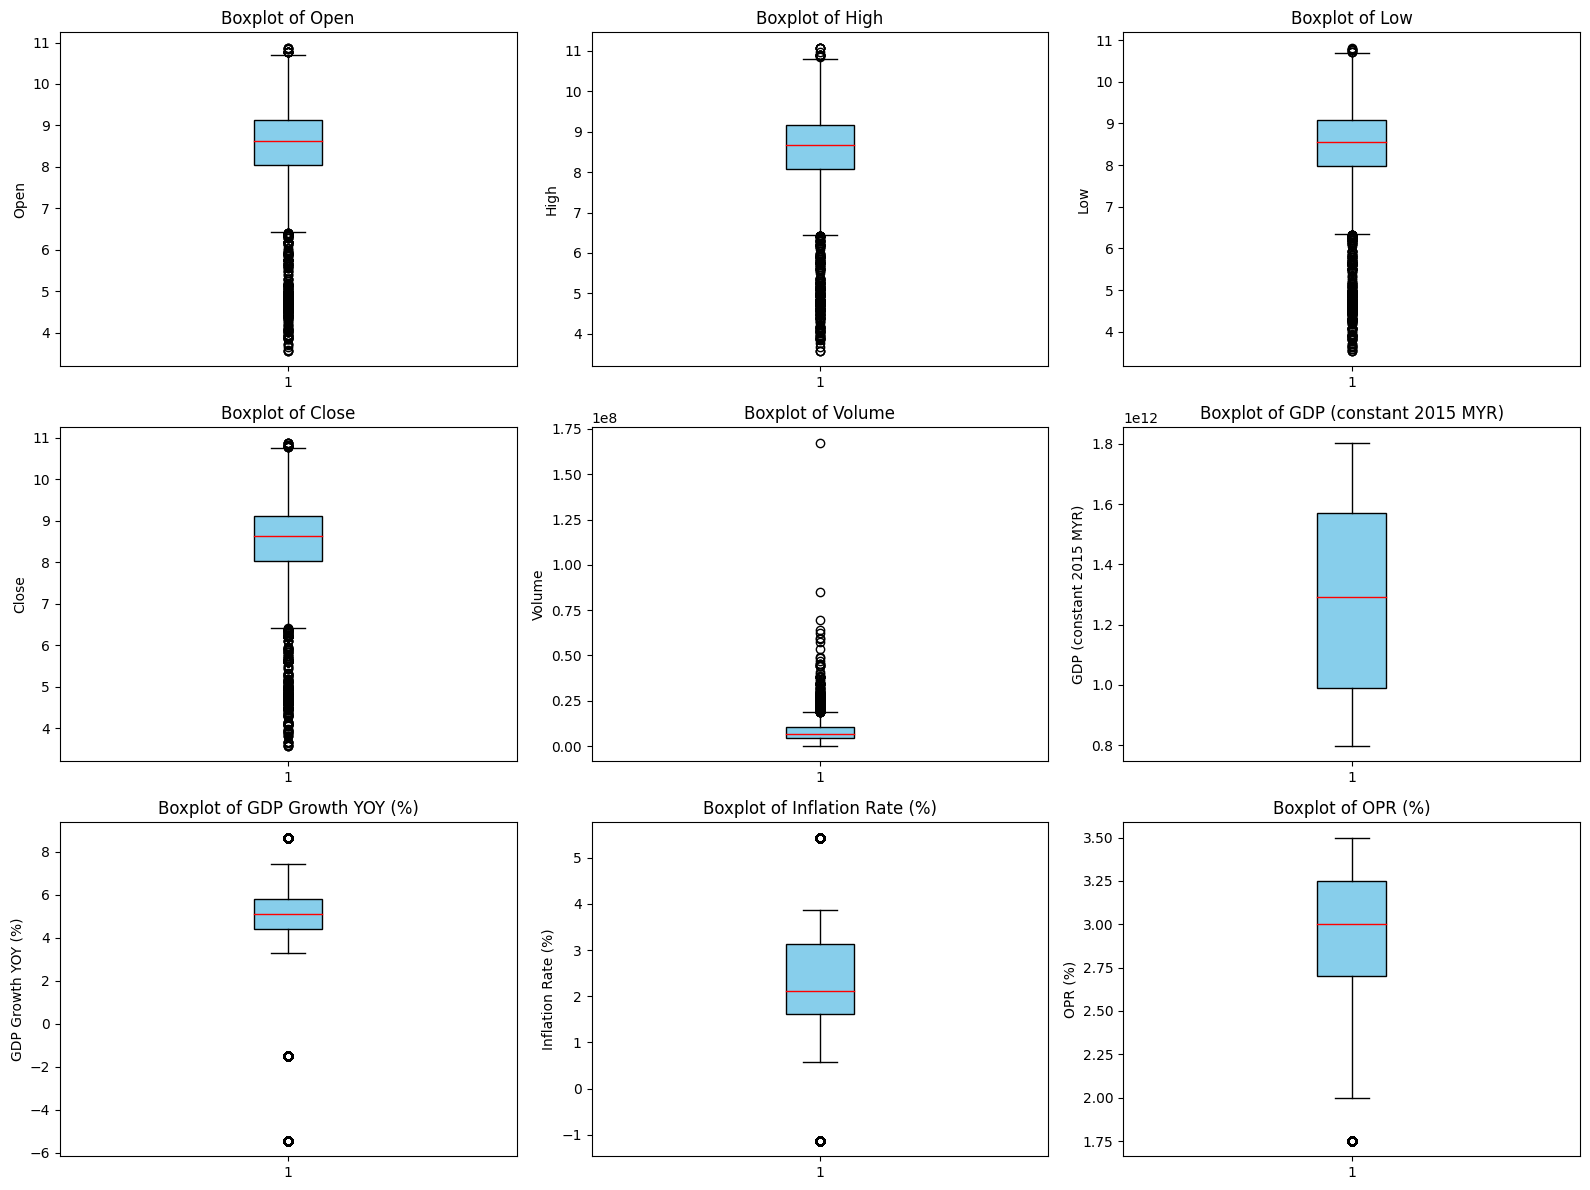

In [29]:
plt.figure(figsize=(16, 12))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(actual_data[column].dropna(), vert=True, patch_artist=True,
                boxprops=dict(facecolor="skyblue", color="black"),
                medianprops=dict(color="red"),
                whiskerprops=dict(color="black"),
                capprops=dict(color="black"))
    plt.title(f"Boxplot of {column}")
    plt.ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

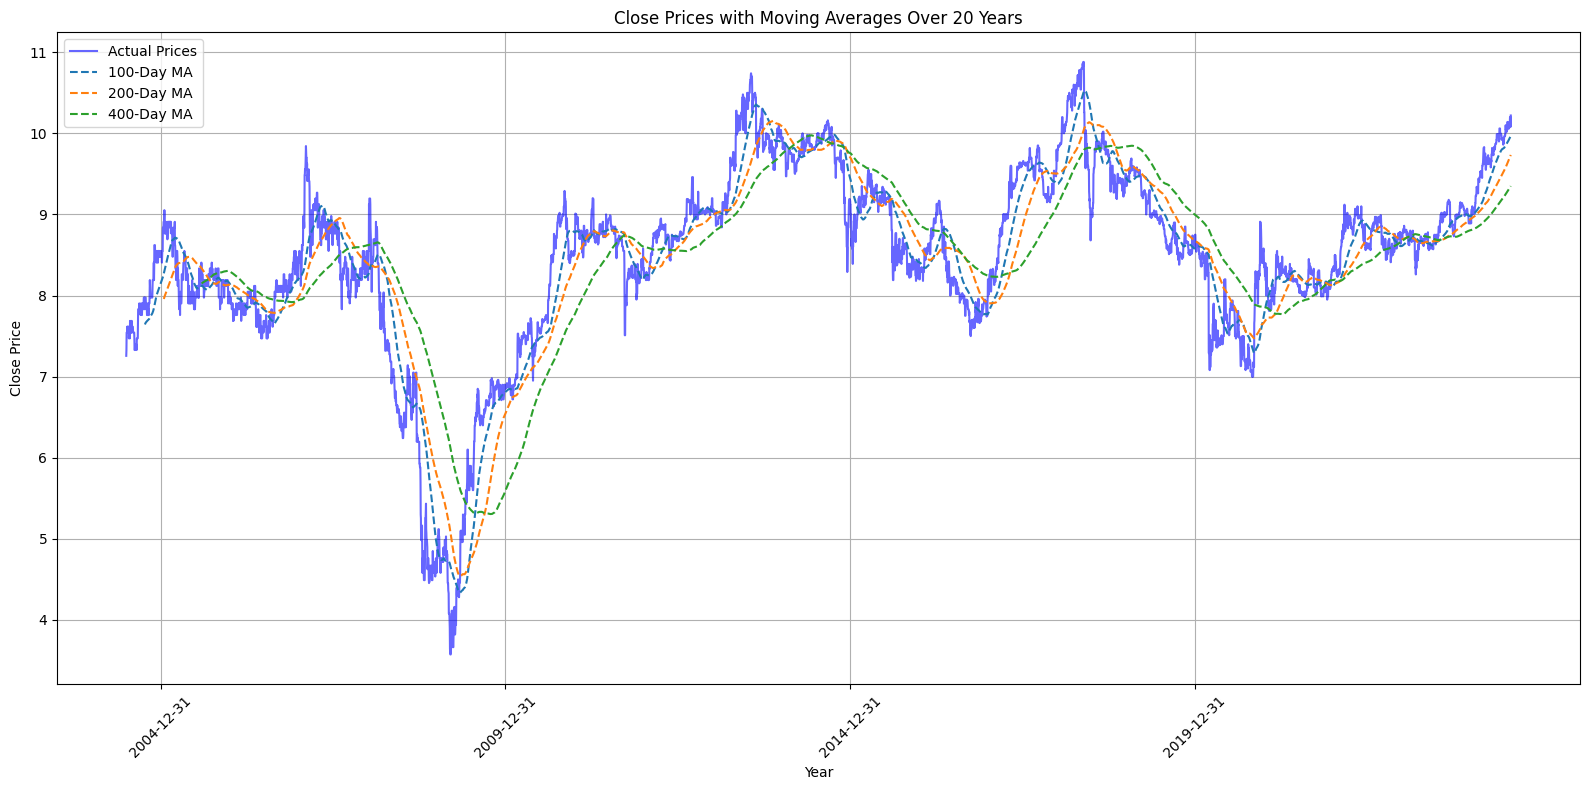

In [28]:
# Define the moving average windows
ma_windows = [100, 200, 400]  # Example: 50-day, 200-day, and 1000-day MAs
# ma_windows = [200, 600]

# Calculate moving averages for each window
for window in ma_windows:
    actual_data[f"MA_{window}"] = actual_data['Close'].rolling(window=window).mean()

# Plot the actual close prices along with the moving averages
plt.figure(figsize=(16, 8))
plt.plot(actual_data.index, actual_data['Close'], label="Actual Prices", linestyle="-", color="blue", alpha=0.6)

# Plot each moving average
for window in ma_windows:
    plt.plot(actual_data.index, actual_data[f"MA_{window}"], label=f"{window}-Day MA", linestyle="--")

# Add title, labels, legend, and grid
plt.title("Close Prices with Moving Averages Over 20 Years")
plt.xlabel("Year")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.xticks(ticks=pd.date_range(start="2004-01-01", end="2024-07-01", freq="5Y"), rotation=45)
plt.tight_layout()
plt.show()


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'GDP (constant 2015 MYR)',
       'GDP Growth YOY (%)', 'Inflation Rate (%)', 'OPR (%)'],
      dtype='object')


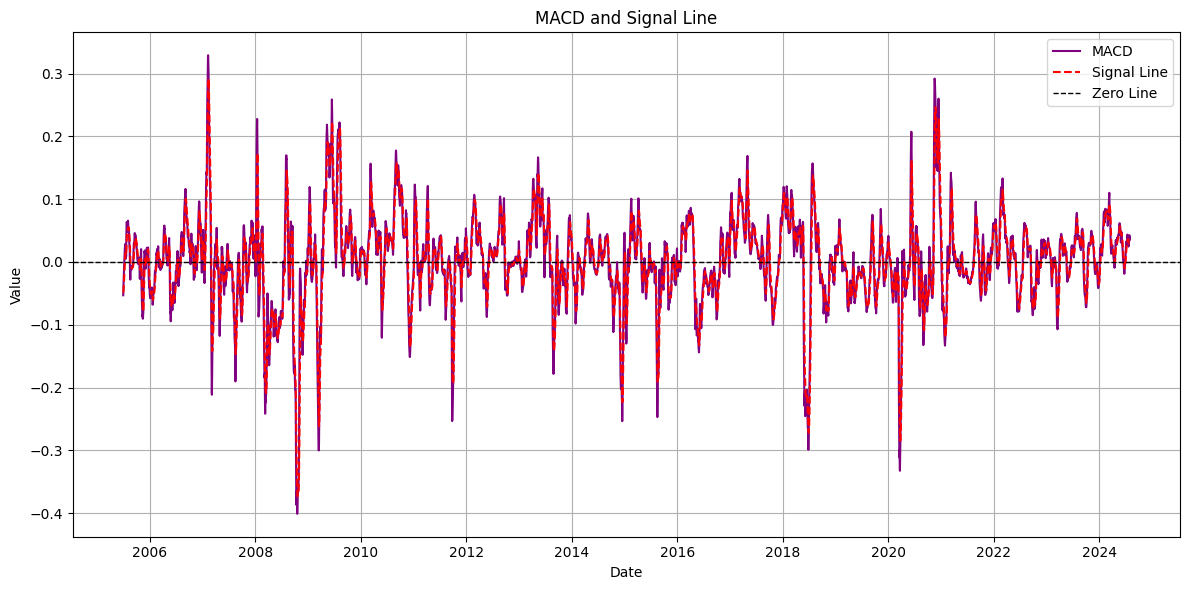

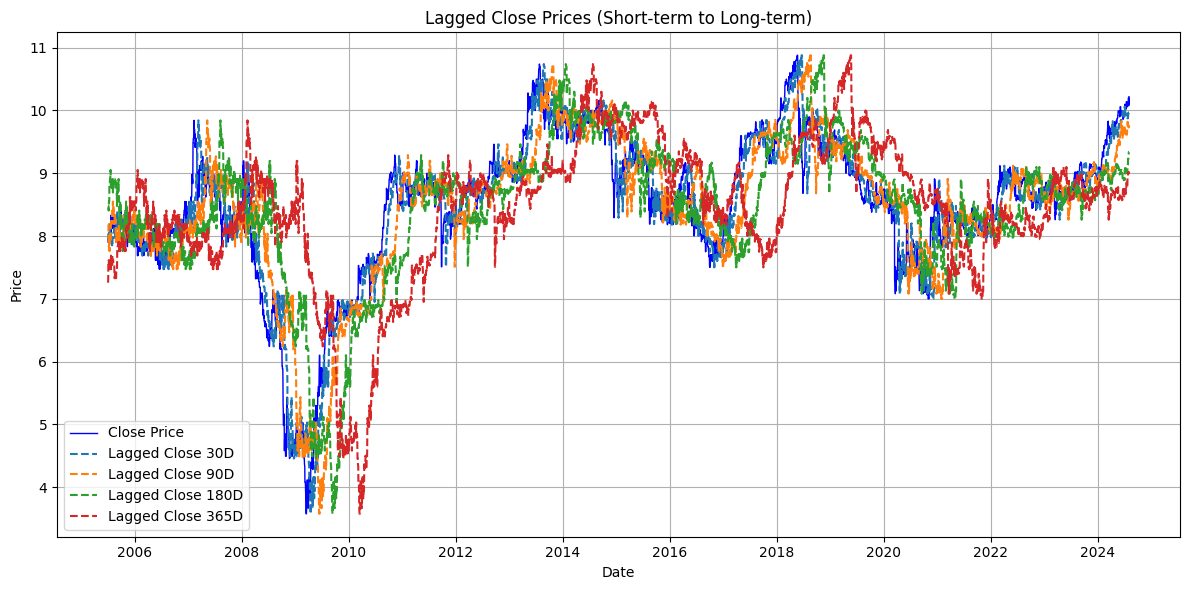

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("data/combined_df.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data.drop(columns='Adj Close')

print(data.columns)

# Define parameters for MACD
short_window = 12  # Short-term EMA (fast)
long_window = 26   # Long-term EMA (slow)
signal_window = 9  # Signal line for MACD

# -----------------------
# Step 1: Calculate MACD
# -----------------------
data['EMA_12'] = data['Close'].ewm(span=short_window, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=long_window, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

# --------------------------
# Step 2: Create Lagged Data
# --------------------------
lag_days = [30, 90, 180, 365]  # Short-term to long-term lag comparison
for lag in lag_days:
    data[f'Lagged_Close_{lag}D'] = data['Close'].shift(lag)

# Drop NaN rows generated due to lagging
data.dropna(inplace=True)

# -------------------------
# Plot 1: MACD Chart
# -------------------------
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['MACD'], label='MACD', color='purple')
plt.plot(data.index, data['Signal_Line'], label='Signal Line', color='red', linestyle='--')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Line')  # Zero line for reference
plt.title("MACD and Signal Line")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# -------------------------
# Plot 2: Lagged Features Chart
# -------------------------
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue', linewidth=1)
for lag in lag_days:
    plt.plot(data.index, data[f'Lagged_Close_{lag}D'], label=f'Lagged Close {lag}D', linestyle='--')
plt.title("Lagged Close Prices (Short-term to Long-term)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


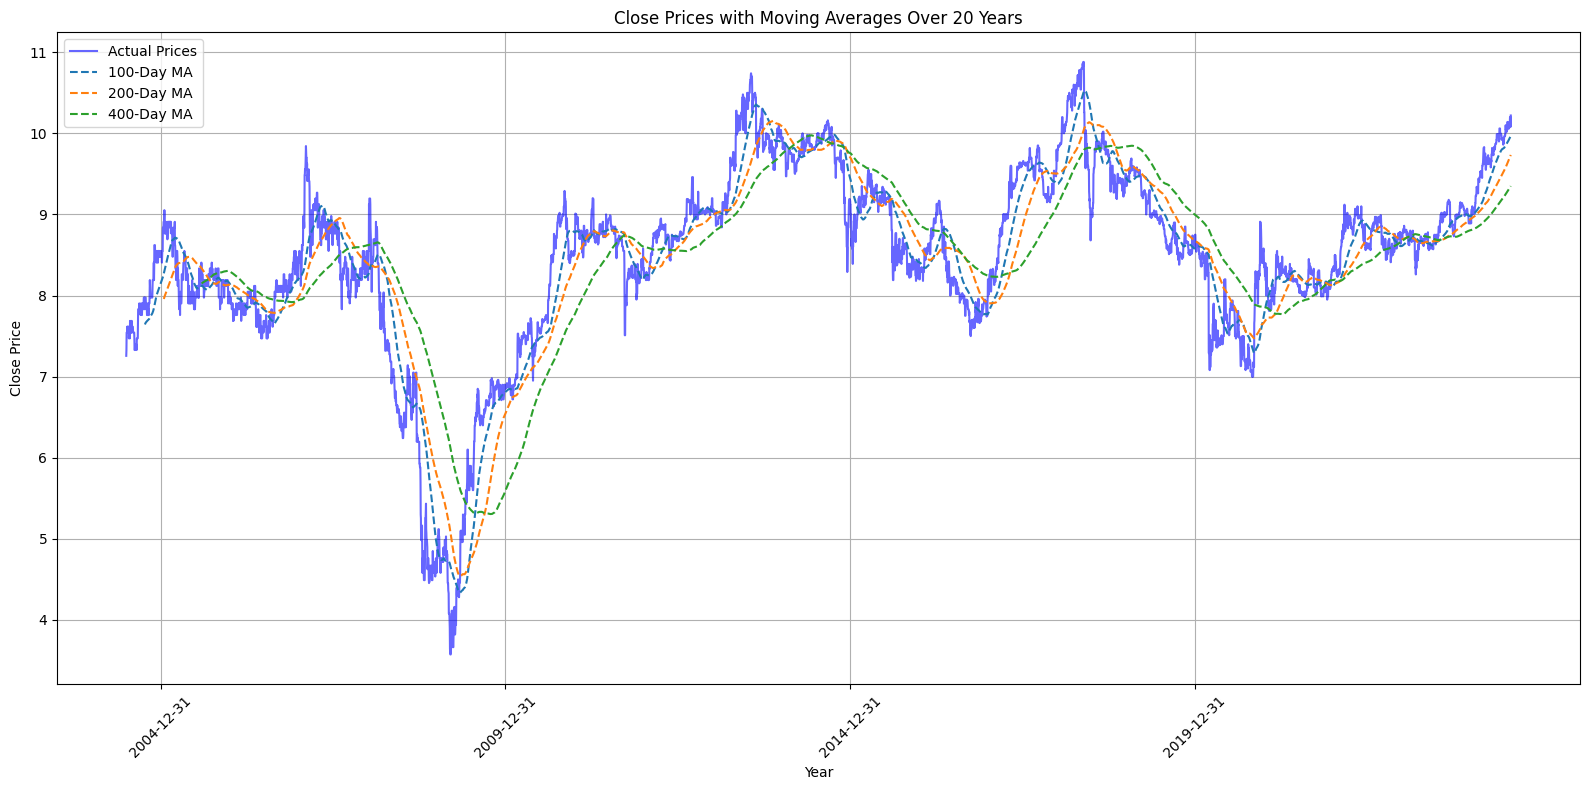

In [19]:
# Load the dataset
data = pd.read_csv("data/combined_df.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data.drop(columns='Adj Close')

# Define the moving average windows
ma_windows = [100, 200, 400]  # Example: 50-day, 200-day, and 1000-day MAs
# ma_windows = [200, 600]

# Calculate moving averages for each window
for window in ma_windows:
    data[f"MA_{window}"] = data['Close'].rolling(window=window).mean()

# Plot the actual close prices along with the moving averages
plt.figure(figsize=(16, 8))
plt.plot(data.index, data['Close'], label="Actual Prices", linestyle="-", color="blue", alpha=0.6)

# Plot each moving average
for window in ma_windows:
    plt.plot(data.index, data[f"MA_{window}"], label=f"{window}-Day MA", linestyle="--")

# Add title, labels, legend, and grid
plt.title("Close Prices with Moving Averages Over 20 Years")
plt.xlabel("Year")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.xticks(ticks=pd.date_range(start="2004-01-01", end="2024-07-01", freq="5Y"), rotation=45)
plt.tight_layout()
plt.show()


In [20]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'GDP (constant 2015 MYR)',
       'GDP Growth YOY (%)', 'Inflation Rate (%)', 'OPR (%)', 'MA_100',
       'MA_200', 'MA_400'],
      dtype='object')

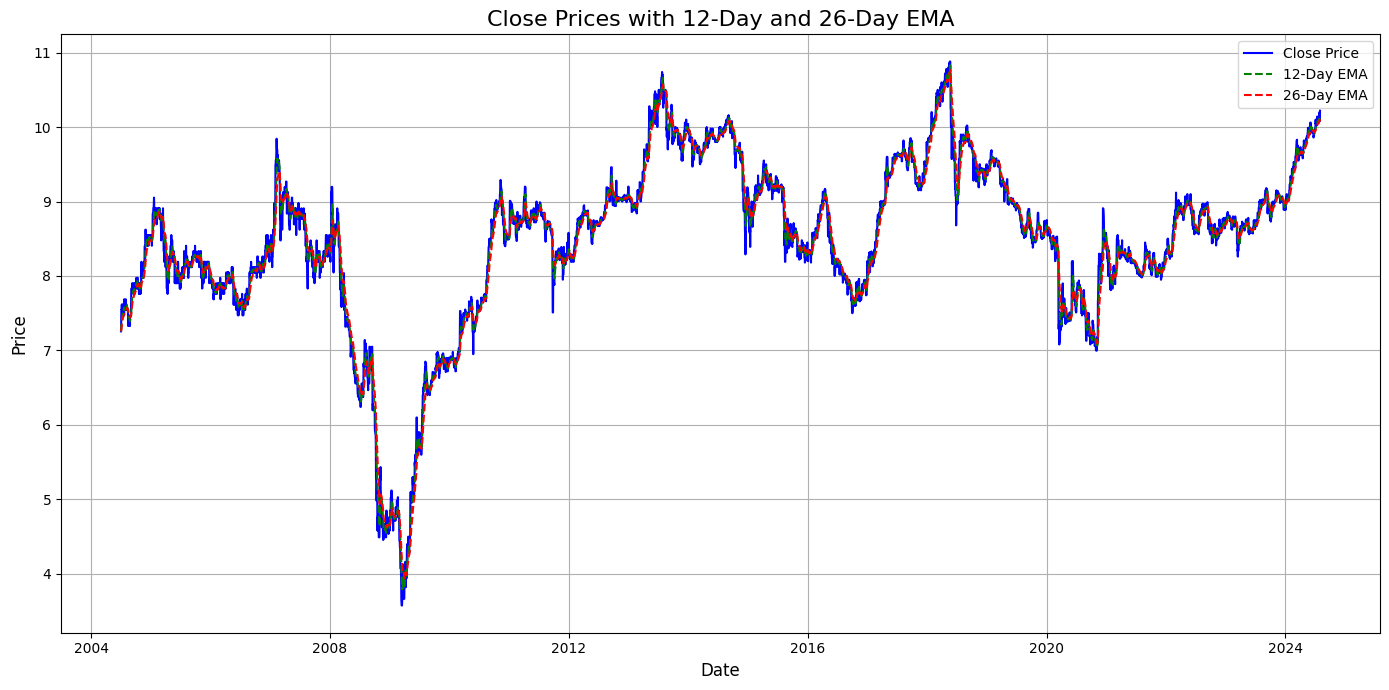

In [22]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the dataset
# data = pd.read_csv("data/combined_df.csv")
# data['Date'] = pd.to_datetime(data['Date'])
# data.set_index('Date', inplace=True)
# data = data.drop(columns='Adj Close')


# Calculate EMA for 12 and 26 periods
ema_short_window = 12  # Short-term EMA
ema_long_window = 26   # Long-term EMA

data['EMA_12'] = data['Close'].ewm(span=ema_short_window, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=ema_long_window, adjust=False).mean()

# Plot the closing prices along with EMA_12 and EMA_26
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label="Close Price", color="blue", linewidth=1.5)
plt.plot(data.index, data['EMA_12'], label="12-Day EMA", color="green", linestyle="--", linewidth=1.5)
plt.plot(data.index, data['EMA_26'], label="26-Day EMA", color="red", linestyle="--", linewidth=1.5)

# Add titles and labels
plt.title("Close Prices with 12-Day and 26-Day EMA", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()

# Display the plot
plt.show()



In [23]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'GDP (constant 2015 MYR)',
       'GDP Growth YOY (%)', 'Inflation Rate (%)', 'OPR (%)', 'MA_100',
       'MA_200', 'MA_400', 'EMA_12', 'EMA_26'],
      dtype='object')

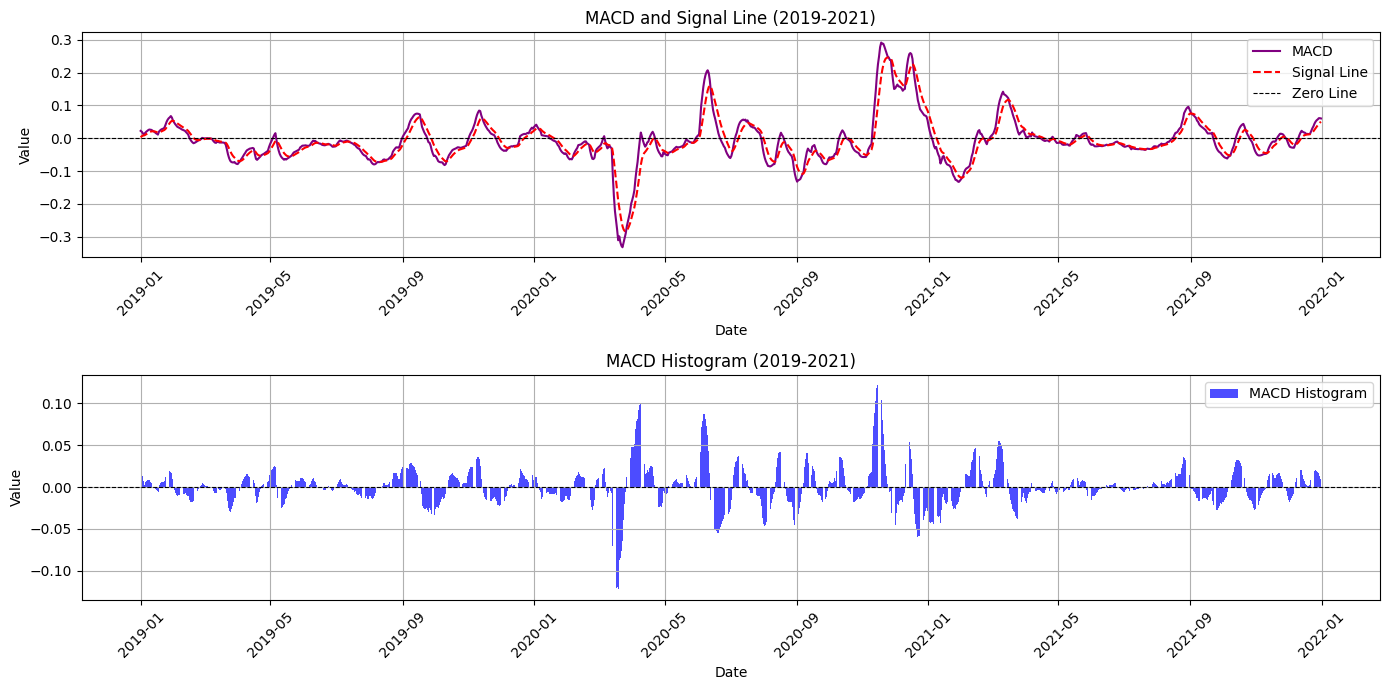

In [24]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the dataset
# data = pd.read_csv("data/combined_df.csv")
# data['Date'] = pd.to_datetime(data['Date'])
# data.set_index('Date', inplace=True)
# data = data.drop(columns='Adj Close')

# Define parameters for MACD
short_window = 12  # Short-term EMA (fast)
long_window = 26   # Long-term EMA (slow)
signal_window = 9  # Signal line for MACD

# -----------------------
# Step 1: Calculate MACD
# -----------------------
data['EMA_12'] = data['Close'].ewm(span=short_window, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=long_window, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()
data['MACD_Histogram'] = data['MACD'] - data['Signal_Line']

# Filter the data for a specific timeframe
start_date = "2019-01-01"
end_date = "2021-12-31"
filtered_data = data.loc[start_date:end_date]

# -----------------------
# Step 2: Plot MACD, Signal Line, and Histogram
# -----------------------
plt.figure(figsize=(14, 7))

# Plot MACD and Signal Line
plt.subplot(2, 1, 1)
plt.plot(filtered_data.index, filtered_data['MACD'], label="MACD", color="purple", linewidth=1.5)
plt.plot(filtered_data.index, filtered_data['Signal_Line'], label="Signal Line", color="red", linestyle="--", linewidth=1.5)
plt.axhline(0, color="black", linestyle="--", linewidth=0.8, label="Zero Line")
plt.title("MACD and Signal Line (2019-2021)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.xticks(rotation=45)

# Plot Histogram
plt.subplot(2, 1, 2)
plt.bar(filtered_data.index, filtered_data['MACD_Histogram'], color='blue', alpha=0.7, label="MACD Histogram")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.title("MACD Histogram (2019-2021)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



In [25]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'GDP (constant 2015 MYR)',
       'GDP Growth YOY (%)', 'Inflation Rate (%)', 'OPR (%)', 'MA_100',
       'MA_200', 'MA_400', 'EMA_12', 'EMA_26', 'MACD', 'Signal_Line',
       'MACD_Histogram'],
      dtype='object')

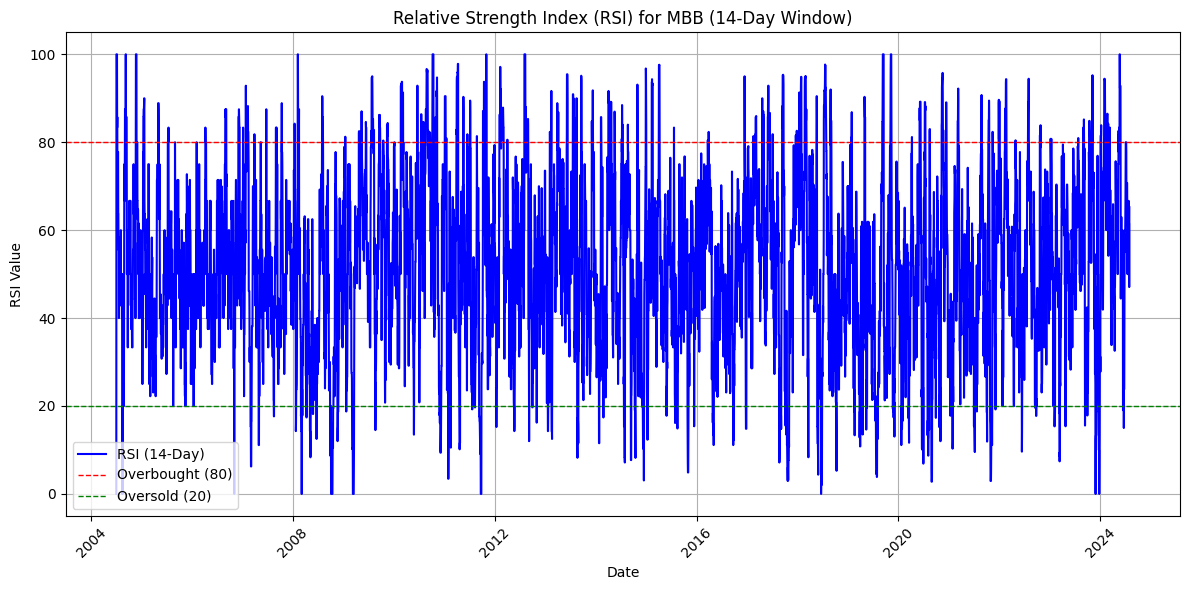

In [26]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Load the dataset
# data = pd.read_csv("data/combined_df.csv")
# data['Date'] = pd.to_datetime(data['Date'])
# data.set_index('Date', inplace=True)
# data = data.drop(columns='Adj Close')

# -------------------------
# Step 1: Define RSI Function
# -------------------------
def calculate_rsi(data, window=14):
    """
    Calculate the Relative Strength Index (RSI).
    """
    # Calculate price differences
    delta = data.diff(1)

    # Separate gains and losses
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    # Convert to pandas Series
    gain = pd.Series(gain, index=data.index)
    loss = pd.Series(loss, index=data.index)

    # Calculate average gains and losses
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    # Handle divide by zero
    rs = avg_gain / (avg_loss + 1e-10)

    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))
    return rsi


# -------------------------
# Step 2: Apply RSI Calculation
# -------------------------
data['RSI_14'] = calculate_rsi(data['Close'], window=14)

# -------------------------
# Step 3: Plot RSI
# -------------------------
plt.figure(figsize=(12, 6))

# Plot the RSI
plt.plot(data['RSI_14'], label="RSI (14-Day)", color="blue", linewidth=1.5)
plt.axhline(80, color="red", linestyle="--", linewidth=1, label="Overbought (80)")
plt.axhline(20, color="green", linestyle="--", linewidth=1, label="Oversold (20)")

# Add titles and labels
plt.title("Relative Strength Index (RSI) for MBB (14-Day Window)")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



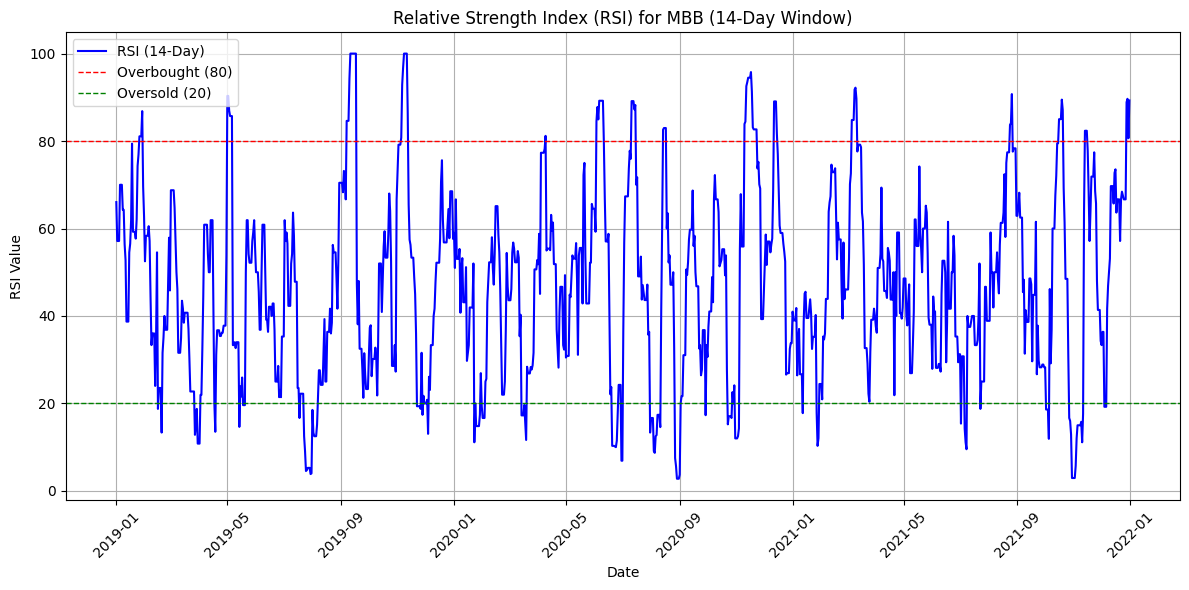

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("data/combined_df.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data.drop(columns='Adj Close')

# -------------------------
# Step 1: Define RSI Function
# -------------------------
def calculate_rsi(data, window=14):
    """
    Calculate the Relative Strength Index (RSI).
    """
    # Calculate price differences
    delta = data.diff(1)

    # Separate gains and losses
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    # Convert to pandas Series
    gain = pd.Series(gain, index=data.index)
    loss = pd.Series(loss, index=data.index)

    # Calculate average gains and losses
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    # Handle divide by zero
    rs = avg_gain / (avg_loss + 1e-10)

    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))
    return rsi


# -------------------------
# Step 2: Apply RSI Calculation
# -------------------------
data['RSI_14'] = calculate_rsi(data['Close'], window=14)
start_date = "2019-01-01"
end_date = "2021-12-31"
filtered_data = data.loc[start_date:end_date]

# -------------------------
# Step 3: Plot RSI
# -------------------------
plt.figure(figsize=(12, 6))

# Plot the RSI
plt.plot(filtered_data['RSI_14'], label="RSI (14-Day)", color="blue", linewidth=1.5)
plt.axhline(80, color="red", linestyle="--", linewidth=1, label="Overbought (80)")
plt.axhline(20, color="green", linestyle="--", linewidth=1, label="Oversold (20)")

# Add titles and labels
plt.title("Relative Strength Index (RSI) for MBB (14-Day Window)")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



In [29]:
print(data.columns)

data.to_csv("data/full_features_df.csv")

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'GDP (constant 2015 MYR)',
       'GDP Growth YOY (%)', 'Inflation Rate (%)', 'OPR (%)', 'MA_100',
       'MA_200', 'MA_400', 'EMA_12', 'EMA_26', 'MACD', 'Signal_Line',
       'MACD_Histogram', 'RSI_14'],
      dtype='object')


In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
data = pd.read_csv("data/full_features_df.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.dropna(inplace=True)
data.head()

# Extract features for PCA
# features = ['Open', 'High', 'Low', 'Close', 'Volume', 'GDP (constant 2015 MYR)',
#             'GDP Growth YOY (%)', 'Inflation Rate (%)', 'OPR (%)', 'MA_100',
#             'MA_200', 'MA_400', 'EMA_12', 'EMA_26', 'MACD', 'Signal_Line',
#             'MACD_Histogram', 'RSI_14']
features = data.columns

X = data[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print("Explained Variance Ratios:", pca.explained_variance_ratio_)
print("Number of components selected:", pca.n_components_)

# PCA result as DataFrame
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(pca.n_components_)])


Explained Variance Ratios: [0.50421127 0.157836   0.11031394 0.0675293  0.05201418 0.0451241
 0.02462342]
Number of components selected: 7


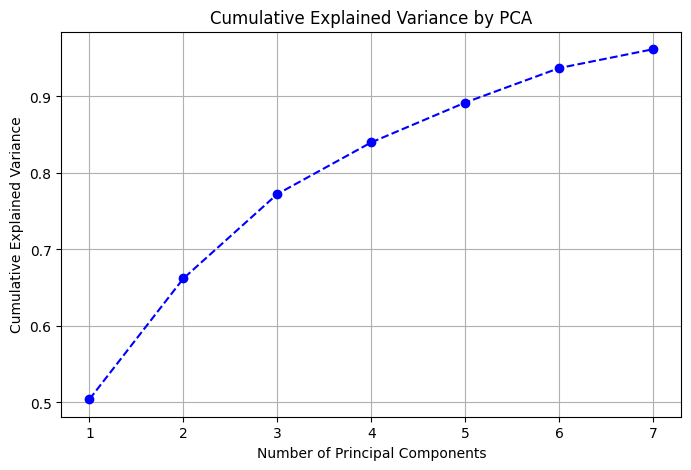

In [5]:
import matplotlib.pyplot as plt
import numpy as np

explained_variance = [0.50421127, 0.157836, 0.11031394, 0.0675293, 0.05201418, 0.0451241, 0.02462342]
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


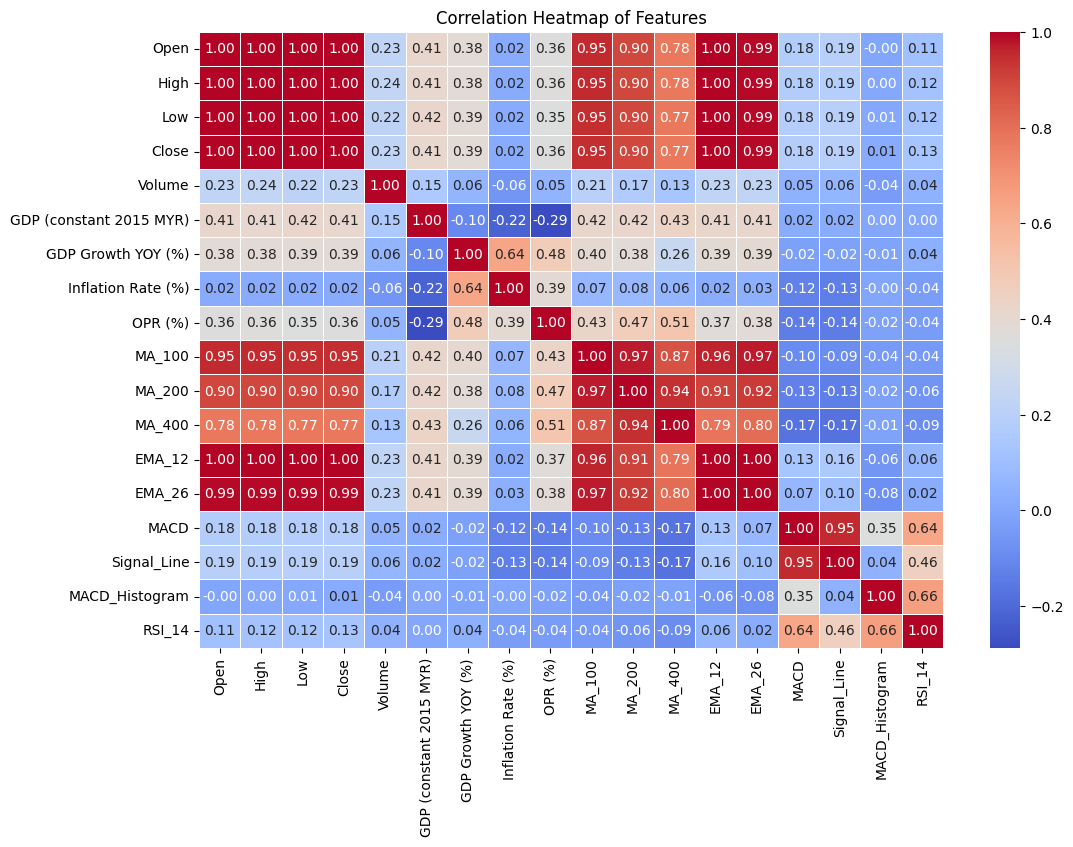

Correlation with 'Close':
 Close                      1.000000
High                       0.998797
Low                        0.998710
Open                       0.997728
EMA_12                     0.995661
EMA_26                     0.990274
MA_100                     0.948173
MA_200                     0.895519
MA_400                     0.774946
GDP (constant 2015 MYR)    0.411547
GDP Growth YOY (%)         0.385277
OPR (%)                    0.359044
Volume                     0.226899
Signal_Line                0.192099
MACD                       0.184630
RSI_14                     0.125851
Inflation Rate (%)         0.017915
MACD_Histogram             0.014858
Name: Close, dtype: float64


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

# Sort features by correlation with 'Close'
correlation_with_close = correlation_matrix['Close'].sort_values(ascending=False)
print("Correlation with 'Close':\n", correlation_with_close)


In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define features and target
features = data.drop(columns=['Close'])  # Drop 'Close' column to use as features
target = data['Close']  # Define 'Close' column as the target

# Define the model
model = LinearRegression()

# Perform RFE
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 7 features
rfe.fit(features, target)

# Print selected features
selected_features = [features.columns[i] for i in range(len(features.columns)) if rfe.support_[i]]
print("Selected Features for Prediction of 'Close':", selected_features)


Selected Features for Prediction of 'Close': ['Open', 'High', 'Low', 'EMA_12', 'MACD_Histogram']


In [31]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Load your dataset
data = pd.read_csv("data/full_features_df.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.dropna(inplace=True)

# Define features and target
X = data.drop(columns=['Close'])  # Independent variables
y = data['Close']  # Target variable

# Define the model
model = LinearRegression()

# Perform RFE
rfe = RFE(estimator=model, n_features_to_select=7)  # Select top 7 features
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]

# Display the selected features
print("Selected Features for Prediction of 'Close':")
for feature in selected_features:
    print(f"- {feature}")

# Create a DataFrame for RFE rankings
feature_ranks = pd.DataFrame({
    'Feature': X.columns,
    'Rank': rfe.ranking_
}).sort_values(by='Rank')

# Display the full ranking as a DataFrame
print("\nFeature Rankings:")
display(feature_ranks)


Selected Features for Prediction of 'Close':
- Open
- High
- Low
- EMA_12
- MACD
- Signal_Line
- MACD_Histogram

Feature Rankings:


,Feature,Rank
0,Open,1
1,High,1
2,Low,1
14,Signal_Line,1
13,MACD,1
11,EMA_12,1
15,MACD_Histogram,1
8,MA_100,2
12,EMA_26,3
9,MA_200,4


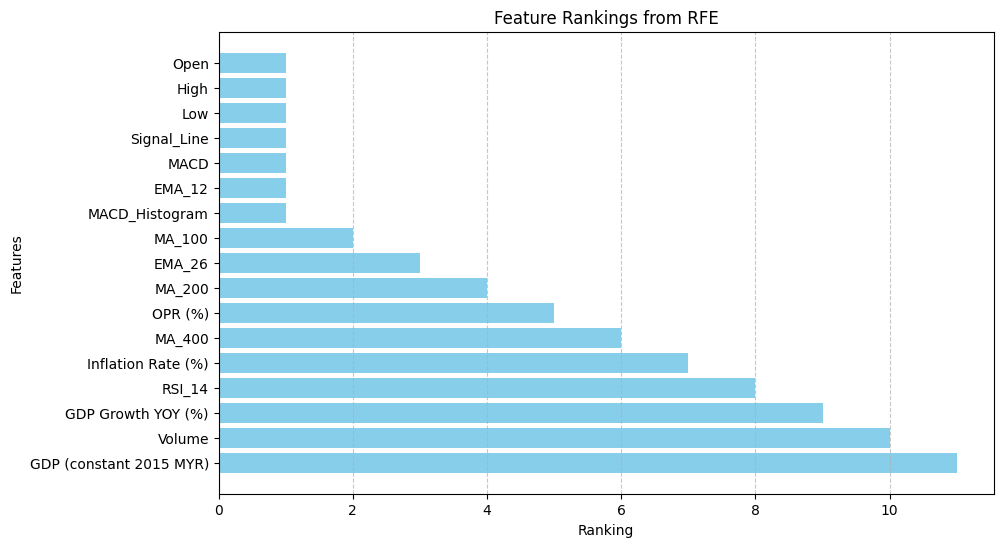

In [32]:
import matplotlib.pyplot as plt

# Plot feature rankings
plt.figure(figsize=(10, 6))
plt.barh(feature_ranks['Feature'], feature_ranks['Rank'], color="skyblue")
plt.xlabel("Ranking")
plt.ylabel("Features")
plt.title("Feature Rankings from RFE")
plt.gca().invert_yaxis()  # Invert axis to show the most important features on top
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()


In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv("data/full_features_df.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.dropna(inplace=True)

# Features and target
X = data.drop(columns=['Close'])
y = data['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------------------
# Step 1: RFE Feature Selection
# -------------------------------------------
# Define the model
model_rfe = LinearRegression()

# Perform RFE
rfe = RFE(estimator=model_rfe, n_features_to_select=7)  # Adjust based on preference
rfe.fit(X_train, y_train)

# Select RFE features
X_train_rfe = X_train.iloc[:, rfe.support_]
X_test_rfe = X_test.iloc[:, rfe.support_]

# Train and predict with RFE features
model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe.predict(X_test_rfe)

# Calculate RMSE for RFE
rmse_rfe = np.sqrt(mean_squared_error(y_test, y_pred_rfe))
print(f"RMSE with RFE Features: {rmse_rfe:.4f}")

# -------------------------------------------
# Step 2: PCA Feature Reduction
# -------------------------------------------
# Apply PCA
pca = PCA(n_components=7)  # Use the same number of features as RFE
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train and predict with PCA features
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)

# Calculate RMSE for PCA
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))
print(f"RMSE with PCA Features: {rmse_pca:.4f}")

# -------------------------------------------
# Step 3: Comparison
# -------------------------------------------
print("\nComparison of RMSE:")
print(f"RFE RMSE: {rmse_rfe:.4f}")
print(f"PCA RMSE: {rmse_pca:.4f}")


RMSE with RFE Features: 0.0410
RMSE with PCA Features: 0.0691

Comparison of RMSE:
RFE RMSE: 0.0410
PCA RMSE: 0.0691


In [28]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load data
data = pd.read_csv("data/full_features_df.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.dropna(inplace=True)

# Step 1: Scale the Data for PCA
X = data.drop(columns=['Close'])
y = data['Close']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Choose a lower threshold, if needed
n_features_pca = (cumulative_variance >= 0.9).argmax() + 1
print(f"Number of features to retain 85% variance: {n_features_pca}")

# Step 2: Use RFE with Features from PCA
model = LinearRegression()

# Transform data using selected PCA components
X_pca = pca.transform(X_scaled)[:, :n_features_pca]  # Select top PCA components

# Perform RFE with reduced features
rfe = RFE(estimator=model, n_features_to_select=7)  # Choose the top 5 features
rfe.fit(X_pca, y)

# Map selected PCA components back to original features
selected_features = [X.columns[i] for i, support in enumerate(rfe.support_) if support]
print("Selected Features:", selected_features)


Number of features to retain 85% variance: 6
Selected Features: ['Open', 'High', 'Low', 'Volume', 'GDP (constant 2015 MYR)', 'GDP Growth YOY (%)']


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

selected_features_rfe = ['Open', 'High', 'Low', 'EMA_12', 'MACD', 'Signal_Line', 'MACD_Histogram']
selected_features_pca = ['Open', 'High', 'Low', 'Volume', 'GDP (constant 2015 MYR)','GDP Growth YOY (%)']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model with RFE features
rfe_model = LinearRegression()
rfe_model.fit(X_train[selected_features_rfe], y_train)
rfe_preds = rfe_model.predict(X_test[selected_features_rfe])
rfe_rmse = mean_squared_error(y_test, rfe_preds, squared=False)

# Model with PCA + RFE features
pca_model = LinearRegression()
pca_model.fit(X_train[selected_features_pca], y_train)
pca_preds = pca_model.predict(X_test[selected_features_pca])
pca_rmse = mean_squared_error(y_test, pca_preds, squared=False)

print("RFE RMSE:", rfe_rmse)
print("PCA + RFE RMSE:", pca_rmse)


RFE RMSE: 0.03596854910805997
PCA + RFE RMSE: 0.04027465204918655


Explained Variance Ratios: [4.77127595e-01 1.66045975e-01 1.16769079e-01 7.14098953e-02
 5.50177623e-02 4.77704704e-02 2.56106168e-02 1.58807508e-02
 1.43657884e-02 8.10009741e-03 1.33509634e-03 3.15653104e-04
 1.04832324e-04 8.58689554e-05 6.05186206e-05 2.75070609e-32
 1.27660258e-32]
Cumulative Variance: [0.4771276  0.64317357 0.75994265 0.83135254 0.88637031 0.93414078
 0.95975139 0.97563214 0.98999793 0.99809803 0.99943313 0.99974878
 0.99985361 0.99993948 1.         1.         1.        ]
Number of components to retain 95% variance: 6


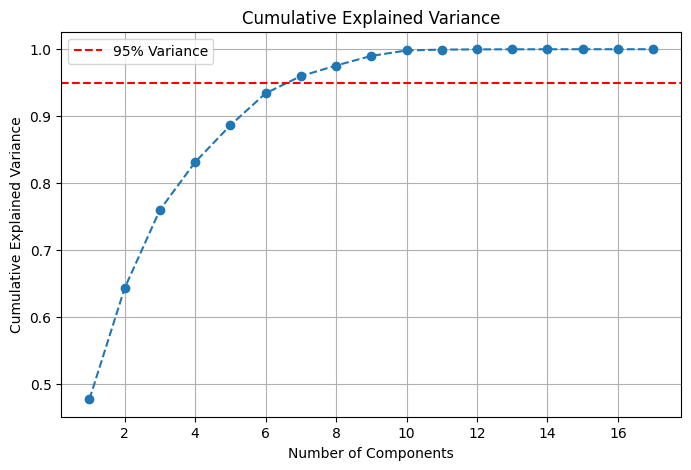

Feature Contribution to Principal Components:
                              PC1       PC2       PC3       PC4       PC5  \
Open                    -0.344329 -0.081158  0.023497 -0.050770 -0.034916   
High                    -0.344344 -0.082003  0.020390 -0.045902 -0.021219   
Low                     -0.343789 -0.085983  0.022488 -0.041916 -0.046633   
Volume                  -0.084928 -0.050802  0.091884 -0.150068  0.971718   
GDP (constant 2015 MYR) -0.151088 -0.076261  0.417487  0.155128  0.025972   
GDP Growth YOY (%)      -0.154197  0.108164 -0.490653 -0.133453  0.071373   
Inflation Rate (%)      -0.031268  0.181071 -0.536950 -0.070778  0.052849   
OPR (%)                 -0.158986  0.188613 -0.415098  0.014745  0.015031   
MA_100                  -0.344338  0.072841  0.040251  0.063824 -0.018021   
MA_200                  -0.335894  0.102041  0.034715  0.122159 -0.043481   
MA_400                  -0.303739  0.127554  0.060368  0.188928 -0.058289   
EMA_12                  -0.345

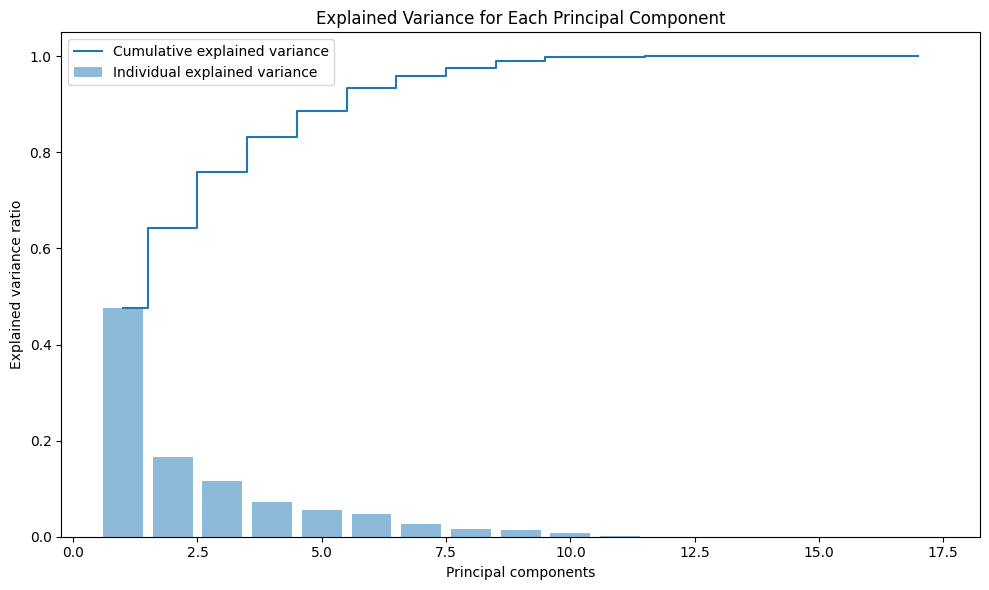

In [30]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("data/full_features_df.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.dropna(inplace=True)

# Define the features (X) and target (y)
X = data.drop(columns=['Close'])
y = data['Close']

# Step 1: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 3: Explained variance ratio and cumulative variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Print explained variance ratio and cumulative variance
print("Explained Variance Ratios:", explained_variance_ratio)
print("Cumulative Variance:", cumulative_variance)

# Step 4: Determine the number of components for 95% variance
n_components = sum(cumulative_variance <= 0.95)
print(f"Number of components to retain 95% variance: {n_components}")

# Step 5: Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.grid()
plt.show()

# Step 6: Reduced PCA dataset for top components
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_scaled)

# Show the contribution of features to each principal component
components = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i}' for i in range(1, n_components + 1)])
print("Feature Contribution to Principal Components:")
print(components.T)

# Step 7: Use RFE to refine feature selection based on PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define the model
model = LinearRegression()

# Perform RFE with the number of features suggested by PCA
rfe = RFE(estimator=model, n_features_to_select=n_components)
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features after PCA + RFE:", list(selected_features))

# Optional: Plot the cumulative variance and feature importance for visualization
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.title('Explained Variance for Each Principal Component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [34]:
from sklearn.model_selection import train_test_split

# Define features and target
features = data[['Open', 'High', 'Low', 'EMA_12', 'MACD', 'Signal_Line', 'MACD_Histogram']]
target = data['Close']

# Split data into train (70%), validation (15%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Output the shape of each dataset
print("Training Set: ", X_train.shape, y_train.shape)
print("Validation Set: ", X_val.shape, y_val.shape)
print("Test Set: ", X_test.shape, y_test.shape)


Training Set:  (4855, 7) (4855,)
Validation Set:  (1041, 7) (1041,)
Test Set:  (1041, 7) (1041,)


In [37]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load the dataset
data = pd.read_csv("data/full_features_df.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.dropna(inplace=True)

# Define features and target
features = data[['Open', 'High', 'Low', 'EMA_12', 'MACD', 'Signal_Line', 'MACD_Histogram']]
target = data['Close']

# Apply MinMaxScaler
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

# Convert back to DataFrame for clarity
normalized_features = pd.DataFrame(normalized_features, columns=features.columns, index=features.index)

# Output the first few rows of the normalized dataset
normalized_features.head()


,Open,High,Low,EMA_12,MACD,Signal_Line,MACD_Histogram
Date,,,,,,,
2005-08-04,0.652374,0.643731,0.638874,0.629884,0.637349,0.643894,0.513968
2005-08-05,0.642564,0.624587,0.638874,0.629124,0.627023,0.644448,0.486237
2005-08-06,0.642564,0.624587,0.638874,0.630052,0.625897,0.644644,0.482899
2005-08-07,0.642564,0.624587,0.638874,0.630837,0.624142,0.644415,0.478938
2005-08-08,0.642564,0.624587,0.638874,0.631501,0.621913,0.643742,0.474799


In [41]:
selected_features_df = data[['Open', 'High', 'Low', 'EMA_12', 'MACD', 'Signal_Line', 'MACD_Histogram', 'Close']]
selected_features_df.to_csv("data/selected_features_df.csv")
selected_features_df.head()

,Open,High,Low,EMA_12,MACD,Signal_Line,MACD_Histogram,Close
Date,,,,,,,,
2005-08-04,8.334119,8.405965,8.190427,8.225175,0.064334,0.054957,0.009378,8.262273
2005-08-05,8.262273,8.262273,8.190427,8.219829,0.056797,0.055325,0.001472,8.190427
2005-08-06,8.262273,8.262273,8.190427,8.226359,0.055975,0.055455,0.000521,8.262273
2005-08-07,8.262273,8.262273,8.190427,8.231884,0.054694,0.055303,-0.000609,8.262273
2005-08-08,8.262273,8.262273,8.190427,8.236559,0.053067,0.054856,-0.001789,8.262273
